In [28]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as accuracy_score 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
data=pd.read_csv('C:/Users/SANU/Downloads/seeddata.csv', names=['Area','Perimeter','Compactness','length of kernel','width of kernel','asymetric coefficient','length of kernel groove','class'])

In [30]:
data

,Area,Perimeter,Compactness,length of kernel,width of kernel,asymetric coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymetric coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [32]:
data['class'],class_names = pd.factorize(data['class'])

In [33]:
print(class_names)
print(data['class'].unique())

Int64Index([1, 2, 3], dtype='int64')
[0 1 2]


In [34]:
data['Area'],_=pd.factorize(data['Area'])
data['Perimeter'],_=pd.factorize(data['Perimeter'])
data['Compactness'],_=pd.factorize(data['Compactness'])
data['length of kernel'],_=pd.factorize(data['length of kernel'])
data['width of kernel'],_=pd.factorize(data['width of kernel'])
data['asymetric coefficient'],_=pd.factorize(data['asymetric coefficient'])
data['length of kernel groove'],_=pd.factorize(data['length of kernel groove'])
data.head()


,Area,Perimeter,Compactness,length of kernel,width of kernel,asymetric coefficient,length of kernel groove,class
0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0
2,2,2,2,2,2,2,2,0
3,3,3,3,3,3,3,3,0
4,4,4,4,4,4,4,4,0


In [35]:
data

,Area,Perimeter,Compactness,length of kernel,width of kernel,asymetric coefficient,length of kernel groove,class
0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0
2,2,2,2,2,2,2,2,0
3,3,3,3,3,3,3,3,0
4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...
205,172,165,182,185,179,202,147,2
206,57,166,183,186,180,203,122,2
207,190,167,45,166,181,204,24,2
208,191,168,184,142,182,205,46,2


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Area                     210 non-null    int64
 1   Perimeter                210 non-null    int64
 2   Compactness              210 non-null    int64
 3   length of kernel         210 non-null    int64
 4   width of kernel          210 non-null    int64
 5   asymetric coefficient    210 non-null    int64
 6   length of kernel groove  210 non-null    int64
 7   class                    210 non-null    int64
dtypes: int64(8)
memory usage: 13.2 KB


In [37]:
X = data
y = data.iloc[:,-1]

In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: class, Length: 210, dtype: int64

In [62]:
model = KMeans(n_clusters=1,random_state=123)
model.fit(X)

KMeans(n_clusters=1, random_state=123)

In [63]:
model.cluster_centers_


array([[ 94.1       ,  80.85238095,  88.87142857,  92.9047619 ,
         87.84285714, 101.72380952,  63.83333333,   1.        ,
          3.27142857]])

In [64]:
model.inertia_


4181021.438095238

In [65]:
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 70 out of 210 samples were correctly labeled.


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


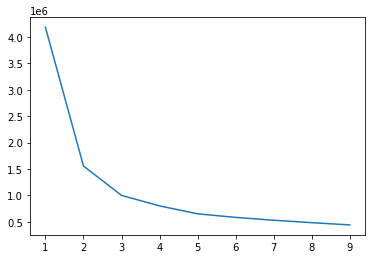

In [61]:
from mpl_toolkits.mplot3d import Axes3D

def elbow_plot(data, maxK=40, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X, maxK=10)


In [51]:
model = KMeans(n_clusters=2,random_state=123)
model.fit(X)
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("correct %.02f classification " % (correct_labels/float(y.size)))

Result: 27 out of 210 samples were correctly labeled.
correct 0.13 classification 
